<a href="https://colab.research.google.com/github/dangtrantrung/TensorFlow_Keras/blob/master/TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
import tensorflow
from tensorflow import keras
print(keras)

<KerasLazyLoader>


In [ ]:
import tensorflow  as tf
# Conv2D
input_shape=(4,30,30,3)
x=tf.random.normal(input_shape)
y=tf.keras.layers.Conv2D(2,3,activation='relu',input_shape=input_shape[1:])(x)
print(y.shape)


(4, 28, 28, 2)


In [ ]:
# CNN model
inputs=keras.layers.Input(shape=[32,32,3])
x=keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(inputs)
x=keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(x)
predictions=keras.layers.MaxPool2D(pool_size=2)(x)

model=keras.Model(inputs=inputs,outputs=predictions)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
predictions.shape

TensorShape([None, 16, 16, 32])

In [ ]:
inputs.shape

TensorShape([None, 32, 32, 3])

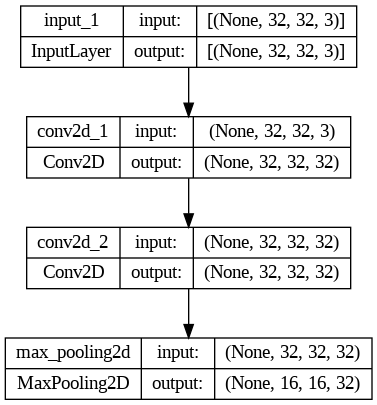

In [ ]:
keras.utils.plot_model(model,'model.png',show_shapes=True)

In [ ]:
# Model Sequential
model_v1=tf.keras.Sequential([
    keras.layers.Dense(1024,input_dim=64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256),
    keras.layers.Activation('softmax')]
)

In [ ]:
model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              66560     
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
Total params: 328960 (1.25 MB)
Trainable params: 328960 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_v1.inputs

[<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_input')>]

In [ ]:
model_v1.outputs

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'activation_1')>]

In [ ]:
model_v2=tf.keras.Sequential()
model_v2.add( keras.layers.Dense(1024,input_dim=64))
model_v2.add( keras.layers.Activation('relu'))
model_v2.add(keras.layers.Dense(256,activation='softmax',kernel_initializer='random_normal'))
model_v2.add(keras.layers.Dense(10,activation='softmax',kernel_initializer='random_normal'))

model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              66560     
                                                                 
 activation_2 (Activation)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 331530 (1.26 MB)
Trainable params: 331530 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_v2.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

In [ ]:
# Sample Data

data=np.random.random((2000,64))
label=np.random.random((2000,10))

valid_data=np.random.random((500,64))
valid_label=np.random.random((500,10))

test_data=np.random.random((500,64))
test_label=np.random.random((500,10))


In [ ]:
data.shape, type(model_v2)

((2000, 64), keras.src.engine.sequential.Sequential)

In [ ]:
model_v2.fit(data, label, epochs=100, batch_size=50, validation_data=(valid_data, valid_label))

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 11.5216 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5216 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5215 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5215 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5217 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5215 - accuracy: 0.1155 - val_loss: 11.5310 - val_accuracy: 0.1020
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5213 - accuracy: 0.1155 - val_loss: 11.5311 - val_accuracy: 0.1020

In [ ]:
model_v2.evaluate(test_data,test_label)

16/16 [==============================] - 0s 3ms/step - loss: 11.5622 - accuracy: 0.0940


[11.562179565429688, 0.09399999678134918]

In [ ]:
results=model_v2.predict(test_data)

16/16 [==============================] - 0s 2ms/step


In [ ]:
results.shape

(500, 10)

In [ ]:
results[0:10][0]

array([0.10204957, 0.09569108, 0.09571774, 0.10301384, 0.10824418,
       0.1067678 , 0.09315227, 0.10114346, 0.09758276, 0.09663732],
      dtype=float32)

In [ ]:
test_label[0:10][0]

array([0.50744851, 0.22098103, 0.46882194, 0.78210094, 0.05660426,
       0.90250769, 0.03908042, 0.65567298, 0.64171387, 0.82318734])

### KERAS FUNCTIONAL API

In [ ]:
import tensorflow  as tf

mnist=tf.keras.datasets.mnist
(X_mnist_train,y_mnist_train),(X_mnist_test,y_mnist_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_mnist_train.shape,X_mnist_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
set(y_mnist_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
def normalize_grayscale(image_data):
  a=0.1
  b=0.9
  image_data_min=image_data.min()
  image_data_max=image_data.max()
  return a+((image_data-image_data_min)*(b-a))/(image_data_max-image_data_min)
train_mnist_features=normalize_grayscale(X_mnist_train)
test_mnist_features=normalize_grayscale(X_mnist_test)

In [ ]:
train_mnist_features[0],test_mnist_features[0]

(array([[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       ],
        [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       ],
        [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.

In [ ]:
inputs=tf.keras.Input(shape=(28,28))
# 28 x 28 = 784 node - pixels
flatten_layer=tf.keras.layers.Flatten()
flatten_ouput=flatten_layer(inputs)
dense_layer=tf.keras.layers.Dense(50,activation='relu')
dense_output=dense_layer(flatten_ouput)
predictions=tf.keras.layers.Dense(10,activation='softmax')(dense_output)

model=tf.keras.Model(inputs=inputs,outputs=predictions)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


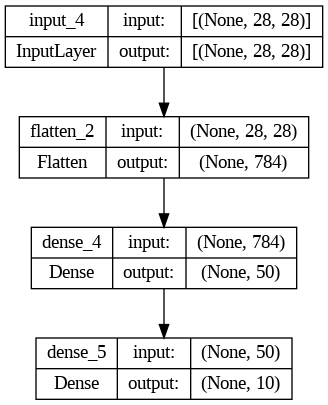

In [ ]:
tf.keras.utils.plot_model(model,"image-classification_model.png",show_shapes=True)

In [ ]:
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
#train
model.fit(train_mnist_features,y_mnist_train,validation_data=(test_mnist_features,y_mnist_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7903 - accuracy: 0.8004 - val_loss: 0.4061 - val_accuracy: 0.8920
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8935 - val_loss: 0.3275 - val_accuracy: 0.9079
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3285 - accuracy: 0.9064 - val_loss: 0.2980 - val_accuracy: 0.9170
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3010 - accuracy: 0.9150 - val_loss: 0.2820 - val_accuracy: 0.9187
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2815 - accuracy: 0.9205 - val_loss: 0.2648 - val_accuracy: 0.9242
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2653 - accuracy: 0.9250 - val_loss: 0.2490 - val_accuracy: 0.9282
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2519 - accuracy: 0.9283 - val_loss: 0.2375 - val_accuracy:

In [ ]:
# Time Distributed
from keras.layers import TimeDistributed

In [ ]:
input_sequences=tf.keras.Input(shape=(10,28,28))
processed_sequences=tf.keras.layers.TimeDistributed(model)(input_sequences)
processed_sequences

<KerasTensor: shape=(None, 10, 10) dtype=float32 (created by layer 'time_distributed')>

In [ ]:
house_data_input=tf.keras.Input(shape=(128,),name="house_data")
x=tf.keras.layers.Dense(64,activation='relu')(house_data_input)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
block1_output=tf.keras.layers.Dense(32,activation='relu')(x)

house_pictures_input=tf.keras.Input(shape=(320,320,3),name="house_pictures")
y=tf.keras.layers.Conv2D(64,3,activation='relu',padding='same')(house_pictures_input)
y=tf.keras.layers.Conv2D(64,3,activation='relu',padding='same')(y)
flatten_layer_house=tf.keras.layers.Flatten()
block2_output=flatten_layer_house(y)

input_feature=tf.keras.layers.concatenate([block1_output,block2_output])

In [ ]:
input_feature

<KerasTensor: shape=(None, 6553632) dtype=float32 (created by layer 'concatenate')>

In [ ]:
predict_price=x=tf.keras.layers.Dense(1,activation='relu',name='price')(input_feature)
time_sale=x=tf.keras.layers.Dense(2,activation='softmax',name='time_sale')(input_feature)
model=tf.keras.Model(inputs=[house_data_input,house_pictures_input],outputs=[predict_price,time_sale])


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 house_data (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 house_pictures (InputLayer  [(None, 320, 320, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 dense_12 (Dense)            (None, 64)                   8256      ['house_data[0][0]']          
                                                                                                  
 conv2d_4 (Conv2D)           (None, 320, 320, 64)         1792      ['house_pictures[0][0]']

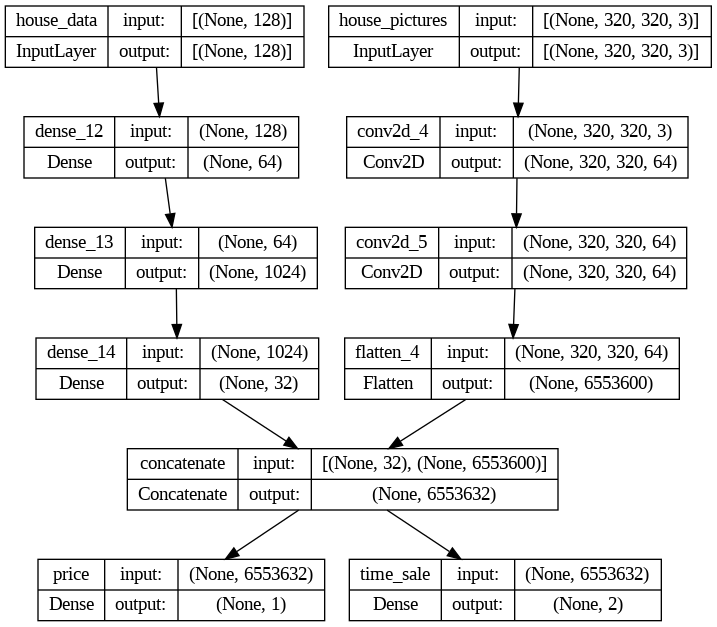

In [ ]:
tf.keras.utils.plot_model(model,"House_sale_model.png",show_shapes=True)

In [ ]:
# Keras SubClass API
import tensorflow as tf
from tensorflow import keras


In [ ]:
help(tf.random_normal_initializer())

Help on RandomNormal in module tensorflow.python.ops.init_ops_v2 object:

class RandomNormal(Initializer)
 |  RandomNormal(mean=0.0, stddev=0.05, seed=None)
 |  
 |  Initializer that generates tensors with a normal distribution.
 |  
 |  Initializers allow you to pre-specify an initialization strategy, encoded in
 |  the Initializer object, without knowing the shape and dtype of the variable
 |  being initialized.
 |  
 |  Examples:
 |  
 |  >>> def make_variables(k, initializer):
 |  ...   return (tf.Variable(initializer(shape=[k], dtype=tf.float32)),
 |  ...           tf.Variable(initializer(shape=[k, k], dtype=tf.float32)))
 |  >>> v1, v2 = make_variables(3,
 |  ...                         tf.random_normal_initializer(mean=1., stddev=2.))
 |  >>> v1
 |  <tf.Variable ... shape=(3,) ... numpy=array([...], dtype=float32)>
 |  >>> v2
 |  <tf.Variable ... shape=(3, 3) ... numpy=
 |  ...
 |  >>> make_variables(4, tf.random_uniform_initializer(minval=-1., maxval=1.))
 |  (<tf.Variable...sh

In [ ]:
class Linear(keras.layers.Layer):
  def __init__(self, units=32):
    super(Linear,self).__init__()
    self.units=units

  def build(self,input_shape):
    # x_output=w*input+b
    w_init=tf.random_normal_initializer()
    self.w=tf.Variable(initial_value=w_init(shape=(input_shape[-1],self.units),dtype='float32'),
                       trainable=True) # False,
    b_init=tf.zeros_initializer()
    self.b=tf.Variable(initial_value=b_init(shape=(self.units,),dtype='float32'),
                       trainable=True) # False,
  def call(self,inputs):
    return tf.matmul(inputs,self.w)+self.b


In [ ]:
linear_layer=Linear(32)
y=linear_layer(x)
y

<tf.Tensor: shape=(2, 32), dtype=float32, numpy=
array([[ 0.0332406 , -0.00950639, -0.10646348,  0.05247452,  0.06739625,
        -0.02523642, -0.0448189 , -0.04867857,  0.05504939, -0.02781125,
        -0.0199851 ,  0.06388399, -0.0161889 , -0.03558719,  0.04368696,
        -0.01433676,  0.03041958,  0.01802075,  0.0585667 , -0.04001752,
        -0.04922938, -0.23321411,  0.03307556,  0.06381182,  0.0707325 ,
        -0.00469751,  0.09275149, -0.01650552,  0.07295059,  0.00476492,
        -0.19340588,  0.04960792],
       [ 0.0332406 , -0.00950639, -0.10646348,  0.05247452,  0.06739625,
        -0.02523642, -0.0448189 , -0.04867857,  0.05504939, -0.02781125,
        -0.0199851 ,  0.06388399, -0.0161889 , -0.03558719,  0.04368696,
        -0.01433676,  0.03041958,  0.01802075,  0.0585667 , -0.04001752,
        -0.04922938, -0.23321411,  0.03307556,  0.06381182,  0.0707325 ,
        -0.00469751,  0.09275149, -0.01650552,  0.07295059,  0.00476492,
        -0.19340588,  0.04960792]], dtyp

In [ ]:
linear_layer.weights


[<tf.Variable 'linear_31/Variable:0' shape=(2, 32) dtype=float32, numpy=
 array([[ 0.04989145,  0.01321676, -0.00529119,  0.04065821,  0.03290063,
          0.05195577, -0.02605917, -0.0542649 ,  0.00776087, -0.0689899 ,
         -0.03054684,  0.05071618,  0.03443039, -0.06538718,  0.03372244,
         -0.0788436 , -0.00096165,  0.0373595 ,  0.05405989, -0.02587522,
          0.00684938, -0.12236126,  0.05145779,  0.06659579,  0.06612992,
          0.05241241,  0.10408773, -0.00463665,  0.06723745, -0.03694117,
         -0.15629657, -0.01434438],
        [-0.01665085, -0.02272315, -0.10117228,  0.01181631,  0.03449562,
         -0.07719219, -0.01875973,  0.00558634,  0.04728853,  0.04117865,
          0.01056174,  0.01316781, -0.05061929,  0.02979999,  0.00996452,
          0.06450684,  0.03138123, -0.01933875,  0.00450681, -0.01414231,
         -0.05607876, -0.11085285, -0.01838223, -0.00278397,  0.00460258,
         -0.05710992, -0.01133625, -0.01186888,  0.00571315,  0.0417061 ,
   

In [ ]:
linear_layer.w

<tf.Variable 'linear_31/Variable:0' shape=(2, 32) dtype=float32, numpy=
array([[ 0.04989145,  0.01321676, -0.00529119,  0.04065821,  0.03290063,
         0.05195577, -0.02605917, -0.0542649 ,  0.00776087, -0.0689899 ,
        -0.03054684,  0.05071618,  0.03443039, -0.06538718,  0.03372244,
        -0.0788436 , -0.00096165,  0.0373595 ,  0.05405989, -0.02587522,
         0.00684938, -0.12236126,  0.05145779,  0.06659579,  0.06612992,
         0.05241241,  0.10408773, -0.00463665,  0.06723745, -0.03694117,
        -0.15629657, -0.01434438],
       [-0.01665085, -0.02272315, -0.10117228,  0.01181631,  0.03449562,
        -0.07719219, -0.01875973,  0.00558634,  0.04728853,  0.04117865,
         0.01056174,  0.01316781, -0.05061929,  0.02979999,  0.00996452,
         0.06450684,  0.03138123, -0.01933875,  0.00450681, -0.01414231,
        -0.05607876, -0.11085285, -0.01838223, -0.00278397,  0.00460258,
        -0.05710992, -0.01133625, -0.01186888,  0.00571315,  0.0417061 ,
        -0.037109

In [ ]:
linear_layer.b

<tf.Variable 'linear_31/Variable:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [ ]:
# Custom Linear Layer
x=tf.ones((2,2))
linear_layer_custom=Linear(32)
y=linear_layer_custom(x)
y

<tf.Tensor: shape=(2, 32), dtype=float32, numpy=
array([[ 0.06064318, -0.02882704,  0.03433502,  0.06469977, -0.19103831,
        -0.00281613, -0.21975897,  0.0364574 , -0.02145265,  0.03149738,
        -0.10525072,  0.01537297,  0.0311174 ,  0.12769817, -0.03707663,
        -0.0601593 ,  0.01779999,  0.12213089,  0.07181554,  0.0448714 ,
        -0.01291542, -0.09176487, -0.01367594,  0.0603995 , -0.16348273,
        -0.01603524, -0.00689358,  0.00502054, -0.01896204, -0.08484709,
         0.14327745,  0.04910799],
       [ 0.06064318, -0.02882704,  0.03433502,  0.06469977, -0.19103831,
        -0.00281613, -0.21975897,  0.0364574 , -0.02145265,  0.03149738,
        -0.10525072,  0.01537297,  0.0311174 ,  0.12769817, -0.03707663,
        -0.0601593 ,  0.01779999,  0.12213089,  0.07181554,  0.0448714 ,
        -0.01291542, -0.09176487, -0.01367594,  0.0603995 , -0.16348273,
        -0.01603524, -0.00689358,  0.00502054, -0.01896204, -0.08484709,
         0.14327745,  0.04910799]], dtyp

In [ ]:
# Custom MLPBlock Layer
class MLPLayer(keras.layers.Layer):
  def __init__(self):
    super(MLPLayer,self).__init__()
    self.linear_1=Linear(32)
    self.linear_2=Linear(32)
    self.linear_3=Linear(1)
  def call(self,inputs):
    x=self.linear_1(inputs)
    x=tf.nn.relu(x)
    x=self.linear_2(x)
    x=tf.nn.relu(x)
    return x

mlp=MLPLayer()
y=mlp(x)
y





<tf.Tensor: shape=(2, 32), dtype=float32, numpy=
array([[0.        , 0.        , 0.00538845, 0.00483359, 0.03230536,
        0.        , 0.00150631, 0.00636872, 0.        , 0.02193522,
        0.        , 0.        , 0.01065287, 0.        , 0.01916944,
        0.0148682 , 0.        , 0.        , 0.00249453, 0.        ,
        0.        , 0.        , 0.01918223, 0.02223047, 0.        ,
        0.        , 0.0129763 , 0.01386518, 0.        , 0.00634693,
        0.        , 0.        ],
       [0.        , 0.        , 0.00538845, 0.00483359, 0.03230536,
        0.        , 0.00150631, 0.00636872, 0.        , 0.02193522,
        0.        , 0.        , 0.01065287, 0.        , 0.01916944,
        0.0148682 , 0.        , 0.        , 0.00249453, 0.        ,
        0.        , 0.        , 0.01918223, 0.02223047, 0.        ,
        0.        , 0.0129763 , 0.01386518, 0.        , 0.00634693,
        0.        , 0.        ]], dtype=float32)>

In [ ]:
# SubClassing Model

class MNISTMODEL(keras.Model):
  def __init__(self,number_class=10):
    super(MNISTMODEL,self).__init__()
    self.number_class=number_class
    self.flatten_1=keras.layers.Flatten()
    self.dropout_1=keras.layers.Dropout(0.1)
    self.dense_1=keras.layers.Dense(50,activation="relu")
    self.dense_2=keras.layers.Dense(10,activation="softmax")

  def call(self,inputs,training=False):
    x=self.flatten_1(inputs)
    x=self.dense_1(x)
    if training:
      x=self.dropout(x,training=training)
    x=self.dense_2(x)
    return x

  mnist=tf.keras.datasets.mnist
  (X_minist_train,y_mnist_train,X_minist_test,y_mnist_test)=mnist.load_data()

  mymnistmodel=MNISTMODEL(10)
  mymnistmodel.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metric=['accuracy'])






